In [20]:
import pickle as pck
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from functions_py import *
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma
import pandas as pd 
# import cv2
import skimage as sk
from sympy import Ellipse, Point
import random
import time
# import pylandau as pland
# import ROOT
import sys

## Charge in ADUs

In [11]:
path = '/home/labdet/Documents/MauSan/Programas/Repositorio_Git/Catalogo_Eventos/dict__straight_muons_Extensions_1_to_4_Imgs_100_Elip_4_ADUs__.pkl'
dict_muons = open(path, 'rb')
dict_muons_true = pck.load(dict_muons)
dict_muons.close()

In [12]:
type(dict_muons_true)
print(dict_muons_true.keys())

print(dict_muons_true['extension_1'].keys())

dict_keys(['All_Muons_Detected', 'extension_1', 'extension_2', 'extension_4'])
dict_keys(['charge', 'Vertical_Events', 'Horizontal_Events'])


65
65
51
26
56
49


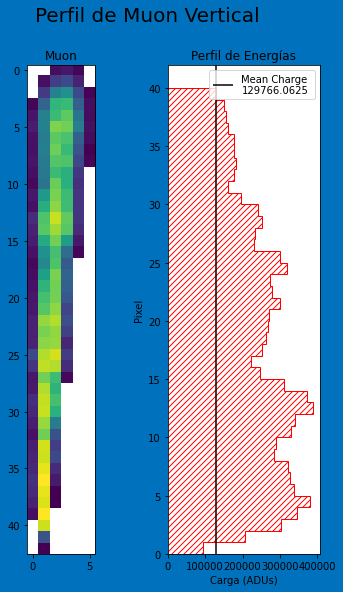

In [45]:
print(len(dict_muons_true['extension_1']['Vertical_Events']))
print(len(dict_muons_true['extension_1']['Horizontal_Events']))

print(len(dict_muons_true['extension_2']['Vertical_Events']))
print(len(dict_muons_true['extension_2']['Horizontal_Events']))

print(len(dict_muons_true['extension_4']['Vertical_Events']))
print(len(dict_muons_true['extension_4']['Horizontal_Events']))


fig, axs = plt.subplots(ncols=2, nrows=1, figsize = [6,9], facecolor = [0, 0.4470, 0.7410])
fig.suptitle('Perfil de Muon Vertical', y = 0.97, size = 20)

for event in dict_muons_true['extension_1']['Vertical_Events'][0:3]:
    # plt.imshow(event)

    label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])

    charge_verticalMuon = []
    for lable_line in range(2,nlabels_verticalMuon - 1):
        line = label_verticalMuon == lable_line
        loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
        mask_35 = np.invert(label_verticalMuon == lable_line)
        data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
        charge = data_mask.sum()
        mean_charge = data_mask.mean()

        charge_verticalMuon.append(charge)
        # print(charge)

    x0 = axs[0].imshow(event)
    axs[0].set_title('Muon')
    # x0bar = fig.colorbar(x0, ax=axs[0])

    axs[1].stairs(charge_verticalMuon, np.arange(0,len(charge_verticalMuon)+1),  orientation='horizontal', hatch = '////', color = 'r')
    axs[1].vlines(x = mean_charge, ymin = 0, ymax = len(event) - 1, color = 'k', label = 'Mean Charge \n' + str(mean_charge))
    axs[1].set_xlabel('Carga (ADUs)')
    axs[1].set_ylabel('Pixel')
    axs[1].set_ylim(0,len(event) - 1 )
    axs[1].set_title('Perfil de Energías')
    axs[1].legend()
    plt.show()

75305.8833132508


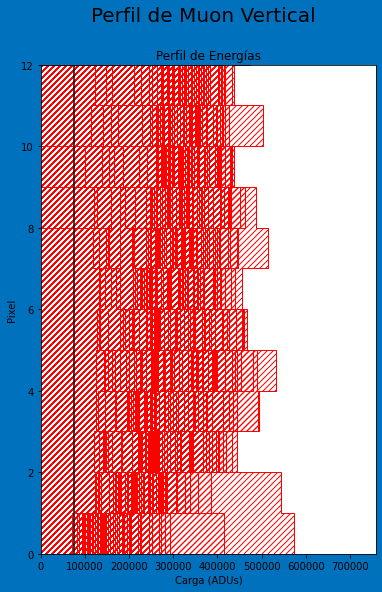

In [62]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize = [6,9], facecolor = [0, 0.4470, 0.7410])
fig.suptitle('Perfil de Muon Vertical', y = 0.97, size = 20)

list_mean_charge = []

for event in dict_muons_true['extension_1']['Vertical_Events']:
    # plt.imshow(event)

    label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])

    charge_verticalMuon = []
    for lable_line in range(2,nlabels_verticalMuon - 1):
        line = label_verticalMuon == lable_line
        loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
        mask_35 = np.invert(label_verticalMuon == lable_line)
        data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
        charge = data_mask.sum()
        mean_charge = data_mask.mean()

        charge_verticalMuon.append(charge)
        list_mean_charge.append(mean_charge)
        # print(charge)

    axs.stairs(charge_verticalMuon, np.arange(0,len(charge_verticalMuon)+1),  orientation='horizontal', hatch = '////', color = 'r')
    # axs.vlines(x = mean_charge, ymin = 0, ymax = len(event) - 1, color = 'k', label = 'Mean Charge \n' + str(mean_charge))
    axs.set_xlabel('Carga (ADUs)')
    axs.set_ylabel('Pixel')
    axs.set_ylim(0,len(event) - 1 )
    axs.set_title('Perfil de Energías')
    # axs.legend()

total_mean_charge = np.mean(list_mean_charge)
print(total_mean_charge)
axs.vlines(x = total_mean_charge, ymin = 0, ymax = len(event) - 1, color = 'k', label = 'Mean Charge \n' + str(mean_charge))
plt.show()

# Charge in eV

In [63]:
path = '/home/labdet/Documents/MauSan/Programas/Repositorio_Git/Catalogo_Eventos/dict__straight_muons_Extensions_1_to_4_Imgs_100_Elip_4_KeV__.pkl'
dict_muons = open(path, 'rb')
dict_muons_true = pck.load(dict_muons)
dict_muons.close()

65
65
52
26
56
51


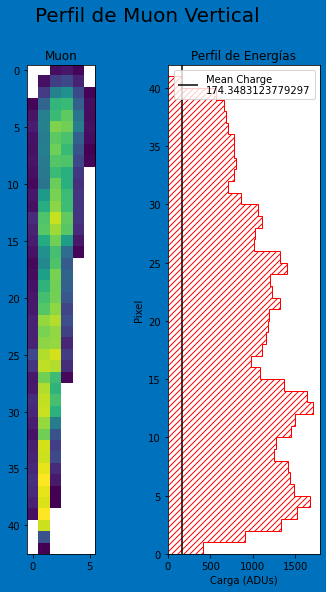

In [69]:
print(len(dict_muons_true['extension_1']['Vertical_Events']))
print(len(dict_muons_true['extension_1']['Horizontal_Events']))

print(len(dict_muons_true['extension_2']['Vertical_Events']))
print(len(dict_muons_true['extension_2']['Horizontal_Events']))

print(len(dict_muons_true['extension_4']['Vertical_Events']))
print(len(dict_muons_true['extension_4']['Horizontal_Events']))


fig, axs = plt.subplots(ncols=2, nrows=1, figsize = [6,9], facecolor = [0, 0.4470, 0.7410])
fig.suptitle('Perfil de Muon Vertical', y = 0.97, size = 20)

for event in dict_muons_true['extension_1']['Vertical_Events'][0:3]:
    # plt.imshow(event)

    label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])

    charge_verticalMuon = []
    for lable_line in range(2,nlabels_verticalMuon):
        line = label_verticalMuon == lable_line
        loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
        mask_35 = np.invert(label_verticalMuon == lable_line)
        data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
        charge = data_mask.sum()
        mean_charge = data_mask.mean()

        charge_verticalMuon.append(charge)
        # print(charge)

    x0 = axs[0].imshow(event)
    axs[0].set_title('Muon')
    # x0bar = fig.colorbar(x0, ax=axs[0])

    axs[1].stairs(charge_verticalMuon, np.arange(0,len(charge_verticalMuon)+1),  orientation='horizontal', hatch = '////', color = 'r')
    axs[1].vlines(x = mean_charge, ymin = 0, ymax = len(event) - 1, color = 'k', label = 'Mean Charge \n' + str(mean_charge))
    axs[1].set_xlabel('Carga (ADUs)')
    axs[1].set_ylabel('Pixel')
    axs[1].set_ylim(0,len(event) - 1 )
    axs[1].set_title('Perfil de Energías')
    axs[1].legend()
    plt.show()

Mean Value: 331.7439794320743 KeV


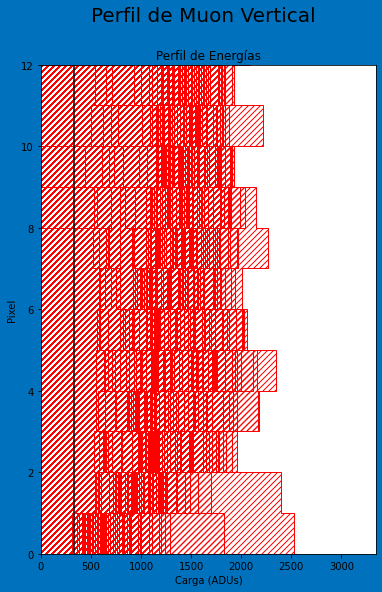

In [66]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize = [6,9], facecolor = [0, 0.4470, 0.7410])
fig.suptitle('Perfil de Muon Vertical', y = 0.97, size = 20)

list_mean_charge = []

for event in dict_muons_true['extension_1']['Vertical_Events']:
    # plt.imshow(event)

    label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])

    charge_verticalMuon = []
    for lable_line in range(2,nlabels_verticalMuon - 1):
        line = label_verticalMuon == lable_line
        loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
        mask_35 = np.invert(label_verticalMuon == lable_line)
        data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
        charge = data_mask.sum()
        mean_charge = data_mask.mean()

        charge_verticalMuon.append(charge)
        list_mean_charge.append(mean_charge)
        # print(charge)

    axs.stairs(charge_verticalMuon, np.arange(0,len(charge_verticalMuon)+1),  orientation='horizontal', hatch = '////', color = 'r')
    # axs.vlines(x = mean_charge, ymin = 0, ymax = len(event) - 1, color = 'k', label = 'Mean Charge \n' + str(mean_charge))
    axs.set_xlabel('Carga (ADUs)')
    axs.set_ylabel('Pixel')
    axs.set_ylim(0,len(event) - 1 )
    axs.set_title('Perfil de Energías')
    # axs.legend()

total_mean_charge = np.mean(list_mean_charge)
print('Mean Value: '+ str(total_mean_charge) + ' KeV')
axs.vlines(x = total_mean_charge, ymin = 0, ymax = len(event) - 1, color = 'k', label = 'Mean Charge \n' + str(mean_charge))
plt.show()